In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import main
import visuals
import seaborn as sns
import requests
import utils
import os
%load_ext autoreload
%autoreload 2

/Users/pramodh/Scrape-Whoscored-Event-Data/soccerenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [13]:
from mplsoccer.pitch import Pitch, VerticalPitch

In [27]:
pd.set_option('display.max_columns',None)

In [2]:
if __name__ == "__main__":
    driver = webdriver.Chrome()
    
# whoscored match centre url of the required match (Example: Barcelona vs Sevilla)
url = "https://www.whoscored.com/Matches/1821225/Live/England-Premier-League-2024-2025-Aston-Villa-Manchester-City"
match_data = main.getMatchData(driver, url, close_window=True)

# Match dataframe containing info about the match
matches_df = main.createMatchesDF(match_data)

# Events dataframe      
events_df = main.createEventsDF(match_data)

# match Id
matchId = match_data['matchId']

# Information about respective teams as dictionary
home_data = matches_df['home'][matchId]
away_data = matches_df['away'][matchId]

Region: England, League: Premier League, Season: 2024/2025, Match Id: 1821225


In [3]:
events_df.head()

,id,eventId,minute,second,teamId,h_a,x,y,expandedMinute,period,...,penaltyShootoutSaved,penaltyShootoutSavedGK,penaltyShootoutConcededGK,throwIn,subOn,subOff,defensiveThird,midThird,finalThird,pos
0,2.760911e+09,3,0,0.0,167,a,0.0,0.0,0,FirstHalf,...,False,False,False,False,False,False,False,False,False,False
1,2.760911e+09,3,0,0.0,24,h,0.0,0.0,0,FirstHalf,...,False,False,False,False,False,False,False,False,False,False
2,2.760911e+09,4,0,0.0,167,a,50.0,50.0,0,FirstHalf,...,False,False,False,False,False,False,True,False,False,True
3,2.760911e+09,5,0,5.0,167,a,30.1,49.4,0,FirstHalf,...,False,False,False,False,False,False,False,False,True,True
4,2.760911e+09,4,0,7.0,24,h,24.7,22.1,0,FirstHalf,...,False,False,False,False,False,False,False,True,False,True


In [4]:
events_df.columns

Index(['id', 'eventId', 'minute', 'second', 'teamId', 'h_a', 'x', 'y',
       'expandedMinute', 'period',
       ...
       'penaltyShootoutSaved', 'penaltyShootoutSavedGK',
       'penaltyShootoutConcededGK', 'throwIn', 'subOn', 'subOff',
       'defensiveThird', 'midThird', 'finalThird', 'pos'],
      dtype='object', length=258)

In [12]:
events_df[events_df['playerName'] == 'Morgan Rogers']

,id,eventId,minute,second,teamId,h_a,x,y,expandedMinute,period,...,penaltyShootoutSaved,penaltyShootoutSavedGK,penaltyShootoutConcededGK,throwIn,subOn,subOff,defensiveThird,midThird,finalThird,pos
61,2.760914e+09,31,4,49.0,24,h,23.5,77.4,4,FirstHalf,...,False,False,False,False,False,False,False,False,False,False
79,2.760914e+09,35,5,0.0,24,h,24.5,72.6,5,FirstHalf,...,False,False,False,False,False,False,False,False,False,False
80,2.760915e+09,46,5,0.0,24,h,23.1,67.3,5,FirstHalf,...,False,False,False,False,False,False,True,False,False,True
140,2.760917e+09,58,10,36.0,24,h,6.7,38.2,10,FirstHalf,...,False,False,False,False,False,False,True,False,False,False
141,2.760917e+09,59,10,37.0,24,h,1.6,43.4,10,FirstHalf,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,2.760971e+09,630,81,51.0,24,h,57.8,72.8,83,SecondHalf,...,False,False,False,False,False,False,False,False,False,False
1253,2.760971e+09,631,81,54.0,24,h,65.6,61.8,83,SecondHalf,...,False,False,False,False,False,False,False,False,True,True
1286,2.760973e+09,639,84,18.0,24,h,43.8,75.1,86,SecondHalf,...,False,False,False,False,False,False,False,True,False,True
1351,2.760977e+09,677,89,12.0,24,h,64.8,74.2,91,SecondHalf,...,False,False,False,False,False,False,False,False,False,False


In [17]:

events_df['type'].unique()


array(['Start', 'Pass', 'Dispossessed', 'Tackle', 'Error', 'BallRecovery',
       'SavedShot', 'Save', 'CornerAwarded', 'Clearance', 'Aerial',
       'MissedShots', 'BallTouch', 'TakeOn', 'Interception',
       'KeeperPickup', 'Foul', 'Challenge', 'OffsideGiven', 'OffsidePass',
       'OffsideProvoked', 'BlockedPass', 'Goal', 'Smother', 'Card', 'End',
       'SubstitutionOff', 'SubstitutionOn', 'FormationChange',
       'ShotOnPost', 'Punch', 'Claim', 'FormationSet'], dtype=object)

In [18]:
rog = events_df[events_df['playerName'] == 'Morgan Rogers']

In [20]:
rog.type.unique()

array(['Dispossessed', 'BallRecovery', 'Pass', 'Clearance',
       'CornerAwarded', 'TakeOn', 'Foul', 'Tackle', 'BallTouch',
       'SavedShot', 'BlockedPass', 'ShotOnPost', 'Goal', 'Challenge',
       'SubstitutionOff'], dtype=object)

In [23]:
rog[rog['type']=='Pass']

,id,eventId,minute,second,teamId,h_a,x,y,expandedMinute,period,...,penaltyShootoutSaved,penaltyShootoutSavedGK,penaltyShootoutConcededGK,throwIn,subOn,subOff,defensiveThird,midThird,finalThird,pos
80,2.760915e+09,46,5,0.0,24,h,23.1,67.3,5,FirstHalf,...,False,False,False,False,False,False,True,False,False,True
213,2.760920e+09,78,15,29.0,24,h,67.0,33.6,15,FirstHalf,...,False,False,False,False,False,False,False,True,False,True
220,2.760920e+09,85,15,56.0,24,h,81.3,59.1,15,FirstHalf,...,False,False,False,False,False,False,False,False,True,True
327,2.760923e+09,122,24,27.0,24,h,23.6,95.6,24,FirstHalf,...,False,False,False,False,False,False,True,False,False,True
413,2.760925e+09,145,29,14.0,24,h,49.1,76.7,29,FirstHalf,...,False,False,False,False,False,False,False,True,False,True
465,2.760926e+09,164,31,49.0,24,h,40.8,94.8,31,FirstHalf,...,False,False,False,False,False,False,False,True,False,True
475,2.760926e+09,171,32,25.0,24,h,43.6,80.1,32,FirstHalf,...,False,False,False,False,False,False,False,False,True,True
484,2.760927e+09,181,32,55.0,24,h,69.6,50.4,32,FirstHalf,...,False,False,False,False,False,False,False,False,True,True
530,2.760929e+09,197,35,40.0,24,h,78.6,89.0,35,FirstHalf,...,False,False,False,False,False,False,False,False,True,True
535,2.760929e+09,202,35,55.0,24,h,66.6,64.5,35,FirstHalf,...,False,False,False,False,False,False,False,True,False,True


In [31]:
col_list = rog.columns.tolist()

In [32]:
col_list

['id',
 'eventId',
 'minute',
 'second',
 'teamId',
 'h_a',
 'x',
 'y',
 'expandedMinute',
 'period',
 'type',
 'outcomeType',
 'qualifiers',
 'satisfiedEventsTypes',
 'isTouch',
 'matchId',
 'startDate',
 'startTime',
 'score',
 'ftScore',
 'htScore',
 'etScore',
 'venueName',
 'maxMinute',
 'playerId',
 'playerName',
 'endX',
 'endY',
 'blockedX',
 'blockedY',
 'goalMouthZ',
 'goalMouthY',
 'isShot',
 'relatedEventId',
 'relatedPlayerId',
 'isGoal',
 'cardType',
 'shotBodyType',
 'situation',
 'shotSixYardBox',
 'shotPenaltyArea',
 'shotOboxTotal',
 'shotOpenPlay',
 'shotCounter',
 'shotSetPiece',
 'shotDirectCorner',
 'shotOffTarget',
 'shotOnPost',
 'shotOnTarget',
 'shotsTotal',
 'shotBlocked',
 'shotRightFoot',
 'shotLeftFoot',
 'shotHead',
 'shotObp',
 'goalSixYardBox',
 'goalPenaltyArea',
 'goalObox',
 'goalOpenPlay',
 'goalCounter',
 'goalSetPiece',
 'penaltyScored',
 'goalOwn',
 'goalNormal',
 'goalRightFoot',
 'goalLeftFoot',
 'goalHead',
 'goalObp',
 'shortPassInaccurate',


In [43]:
rog_pass = rog[rog['type']=='Pass']

In [44]:
rog_pass_stat = rog_pass[['x','y',
'endX','endY','outcomeType','passBack','passForward','passLeft','passRight','keyPassLong',
 'keyPassShort',
 'keyPassCross',
 'keyPassCorner',
 'keyPassThroughball',
 'keyPassFreekick',
 'keyPassThrowin',
 'keyPassOther',
 'finalThird']].reset_index(drop=True)

In [45]:
rog_pass_stat

,x,y,endX,endY,outcomeType,passBack,passForward,passLeft,passRight,keyPassLong,keyPassShort,keyPassCross,keyPassCorner,keyPassThroughball,keyPassFreekick,keyPassThrowin,keyPassOther,finalThird
0,23.1,67.3,24.2,61.7,Successful,False,True,False,True,False,False,False,False,False,False,False,False,False
1,67.0,33.6,65.4,14.4,Successful,True,False,False,True,False,False,False,False,False,False,False,False,False
2,81.3,59.1,88.6,40.7,Successful,False,True,False,True,False,True,False,False,False,False,False,True,True
3,23.6,95.6,23.8,92.9,Unsuccessful,False,True,False,True,False,False,False,False,False,False,False,False,False
4,49.1,76.7,49.2,67.9,Successful,False,True,False,True,False,False,False,False,False,False,False,False,False
5,40.8,94.8,44.8,68.8,Successful,False,True,False,True,False,False,False,False,False,False,False,False,False
6,43.6,80.1,72.2,81.2,Successful,False,True,True,False,False,False,False,False,False,False,False,False,True
7,69.6,50.4,85.9,53.7,Unsuccessful,False,True,True,False,False,False,False,False,False,False,False,False,True
8,78.6,89.0,67.7,90.6,Successful,True,False,True,False,False,False,False,False,False,False,False,False,True
9,66.6,64.5,62.5,65.5,Successful,True,False,True,False,False,False,False,False,False,False,False,False,False


In [146]:
rog_touch = rog[rog['isTouch']==True].reset_index(drop=True)

In [153]:
rog_shots = rog[rog['type'].isin(['SavedShot','ShotOnPost', 'Goal'])].reset_index(drop=True)

In [161]:
rog_shots[['x','y','type','goalMouthZ',
 'goalMouthY']]

,x,y,type,goalMouthZ,goalMouthY
0,86.2,68.2,SavedShot,19.0,48.9
1,89.8,57.5,ShotOnPost,2.5,55.7
2,86.4,56.5,Goal,1.3,47.0
3,92.6,36.4,SavedShot,19.0,48.9


KeyError: "['goalmouthY'] not in index"

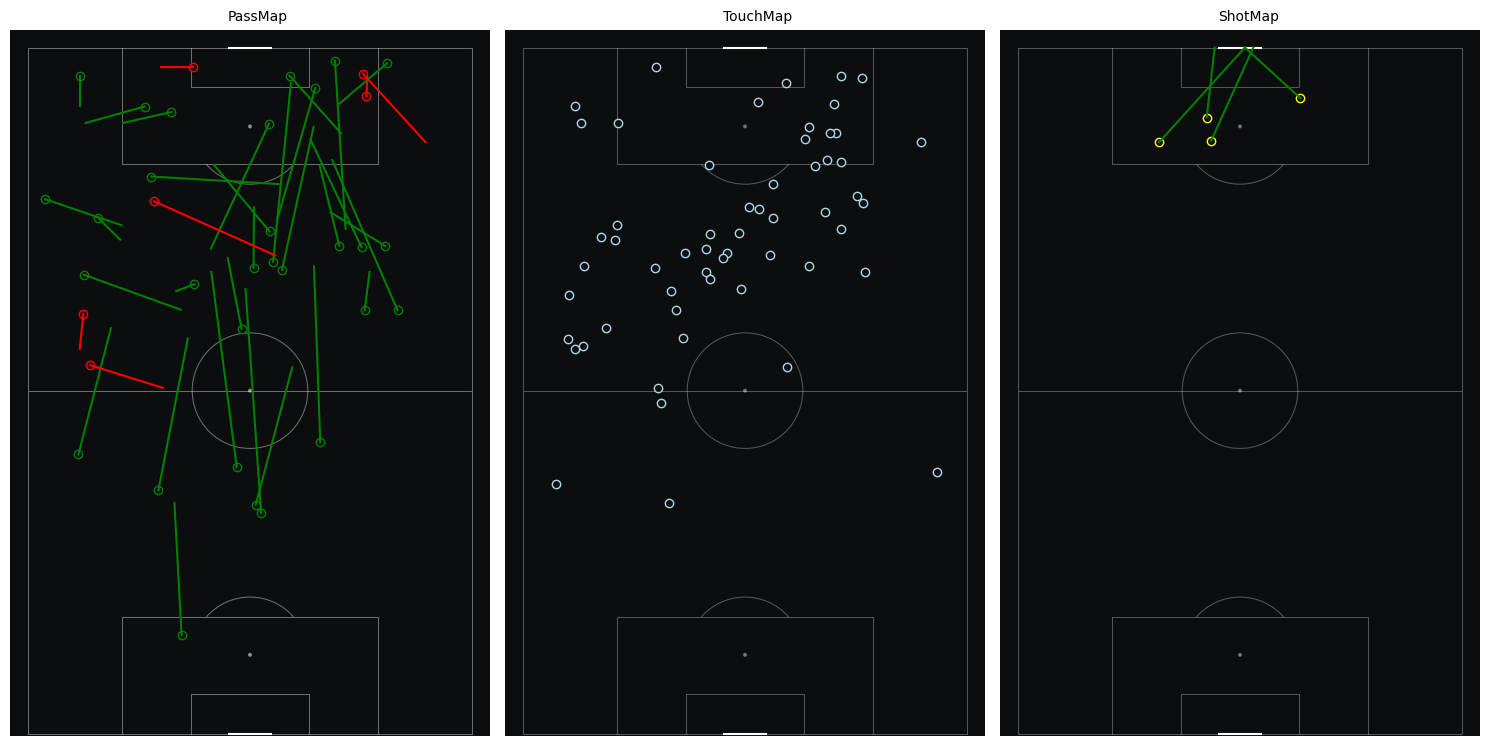

In [167]:
fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(15,15))

pitch1  = VerticalPitch(
    pitch_type='opta', 
    half=False, 
    pitch_color='#0C0D0E', 
    pad_bottom=.5, 
    line_color='white',
    line_alpha=0.4,
    linewidth=.75,
   
)
pitch2 = VerticalPitch(
    pitch_type='opta', 
    half=False, 
    pitch_color='#0C0D0E', 
    pad_bottom=.5, 
    line_color='white',
    line_alpha=0.3,
    linewidth=.75,
   
)
pitch3 = VerticalPitch(
    pitch_type='opta', 
    half=False, 
    pitch_color='#0C0D0E', 
    pad_bottom=.5, 
    line_color='white',
    line_alpha=0.3,
    linewidth=.75,
   
)

pitch1.draw(ax=axs[0]) 
pitch2.draw(ax=axs[1]) 
pitch3.draw(ax=axs[2]) 

axs[0].text(s="PassMap",x=55,y=104)
axs[1].text(s="TouchMap",x=55,y=104)
axs[2].text(s="ShotMap",x=55,y=104)

for i in range(len(rog_pass_stat)):
   if(rog_pass_stat.loc[i]['outcomeType']=='Successful'):
    axs[0].scatter(x = rog_pass_stat.loc[i]['endX'], y = rog_pass_stat.loc[i]['endY'],color='#0C0D0E',edgecolors='green')
    axs[0].plot([rog_pass_stat.loc[i]['x'],rog_pass_stat.loc[i]['endX']],[rog_pass_stat.loc[i]['y'],rog_pass_stat.loc[i]['endY']],color='green')
   else:
     axs[0].scatter(x = rog_pass_stat.loc[i]['endX'], y = rog_pass_stat.loc[i]['endY'],color='#0C0D0E',edgecolors='red')
     axs[0].plot([rog_pass_stat.loc[i]['x'],rog_pass_stat.loc[i]['endX']],[rog_pass_stat.loc[i]['y'],rog_pass_stat.loc[i]['endY']],color='red')

for i in range(len(rog_touch)):
  axs[1].scatter(x=rog_touch.loc[i]['x'],y=rog_touch.loc[i]['y'],color='#0C0D0E',edgecolors='lightblue')

for i in range(len(rog_shots)):
  axs[2].scatter(x=rog_shots.loc[i]['y'],y=rog_shots.loc[i]['x'],color='#0C0D0E',edgecolors='yellow')
  axs[2].plot([rog_shots.loc[i]['y'],rog_shots.loc[i]['goalMouthY']],[rog_shots.loc[i]['x'],100.0],color='green')



  
     
      


plt.tight_layout()
plt.show()

In [168]:
print("hello")

hello


In [169]:
for i in range(len(rog_touch)):
    print(rog_touch.loc[i]['x'])

23.5
23.1
6.7
67.0
81.3
51.4
54.0
28.4
23.6
49.1
40.8
43.6
69.6
78.6
66.6
78.9
10.5
70.0
58.8
47.1
86.2
70.2
79.2
88.2
87.0
31.9
34.3
29.5
31.5
44.3
58.7
58.1
57.8
82.4
89.7
89.8
24.7
46.8
64.0
86.4
63.5
69.0
88.3
55.0
92.6
28.5
30.8
29.9
51.0
35.6
40.5
36.4
28.4
35.7
57.8
65.6
43.8
